# Моделирование оттока клиентов: отчет о работе

## 1. Цели и задачи проекта

Выстраивание взаимоотношений с клиентами или customer relationship managmenet (CRM) является важным звеном в функционировании любого бизнеса. От того, насколько хорошо простроена работа с аудиторией зачастую зависит успех всей компании. В данном проекте проводится анализ одной из наиболее актуальных задач из области CRM: прогнозирования оттока пользователей или churn prediction. Суть задачи заключается в заблаговременном нахождении сегмента пользователей, склонных через некоторый промежуток времени отказаться от использования некоторого продукта или услуги. Точное и своевременное нахождение таких пользователей позволяет эффективно бороться с их оттоком, например, выявлять причины оттока и принимать меры по удержанию клиентов. Эта задача актуальна для большинства организаций, оказывающих услуги в сегменте B2C и вдвойне актуальна в областях, где распространение услуги близко к отметке 100%. Хороший пример такой области – рынок мобильной связи, где насыщение уже фактически произошло, и как следствие постепенно снижается прирост клиентской базы. В такой ситуации задача удержания клиентов и выстраивания с ними взаимоотношений выходит на первый план.

Математически задачу можно сформулировать следующим образом.

Пусть $X$ - множество признаковых описаний клиентов, $Y = \{0, 1\}$ - множество бинарных ответов: 0 - клиент остался, 1 - клиент ушел. Требуется построить алгоритм $a$, то есть функцию $a: X \rightarrow Y$ так, чтобы на известных данных $(X_1, y_1), (X_2, y_2), ..., (X_n, y_n)$ алгоритм давал наименьшую ошибку. Ниже мы выберем как внутреннюю метрику задачи, по которой будем судить о качестве решения, так и внешнюю метрику, понятную заказчику. Минимизация ошибки алгоритма по внутренней метрике должна в итоге приводить к увеличению экономического эффекта от проведения соответствующей кампании.

На самом деле мы, как это обычно делают в задачах бинарной классификации, несколько расширим область значений алгоритма $a$, полагая $a: X \rightarrow [0, 1]$, то есть вывод алгоритма будет не бинарный, а вероятностноподобный. Значение окончательной метки на конкретном $x$ затем можно выбирать как $[a(x) > h]$, то есть 1, если $a(x)$ больше некоторого порога $h$ и 0 в противном случае. Значение порога $h$ выбирается в самом конце таким образом, чтобы максимизировать внешнюю метрику задачи - экономический эффект.

Таким образом, рассматривается задача бинарной классификации в классической постановке и стандартными внутренними метриками оценки качества. Особенностью задачи является то, что данные полностью анонимизированны вплоть до названия колонок. Данные возьмем с соревнования kaggle https://www.kaggle.com/c/telecom-clients-churn-prediction

## 2. Методика измерения качества и критерий успеха

### 2.1 Внутренние методики оценки качества

В качестве внутренних метрик задачи мы выберем стандартные метрики для бинарной классификации: [ROC-AUC](https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/) (основная), Precision, Recall, F1 (дополнительные). 

### 2.2 Экономический эффект кампании

Внешней метрикой будет общий экономический эффект, даваемый выбранным алгоритмом и определяемый следующим образом.

Будем исследовать экономический эффект, являющийся разностью полной прибыли после внедрения модели и прибыли без ее внедрения.
Введем следующие параметры:

$M$ - в среднем прибыли приносит один пользователь

$H$ - мы готовы потратить на удержание одного пользователя

$p$ - вероятность пользователю, собирающемуся уйти, принять наши условия и остаться

$g$ - доля TOP пользователей, участвующих в программе по удержанию. Фактически эту величину можно считать порогом алгоритма (threshold), выше которого его значения проецируются в 1, ниже - в 0

$T$ - полный бюджет кампании, который мы не должны превысить.


Вся выборка пользователей разделяется на 4 части:

$TP$ - пользователи, которые собираются уйти согласно нашему алгоритму и в действительности

$FP$ - пользователи, которые собираются уйти согласно нашему алгоритму, но не в действительности

$TN$ - пользователи, которые не собираются уйти согласно нашему алгоритму, и в действительности

$FN$ - пользователи, которые не собираются уйти согласно нашему алгоритму, но не в действительности

Все величины $TP, FP, TN, FN$ - функции параметра $g$

$TP$ часть

$p$ доля из них примет наши условия и останется, принеся в итоге $p \cdot TP \cdot (M - H)$, $1-p$ доля все равно уйдет, принеся убыток $-(1-p) \cdot TP \cdot H$. Если же не проводить кампанию ($g=0$), то прибыть от этой части пользователей составит 0.

В итоге вклад в экономический эффект от $TP$ пользователей составит

$$
L_{TP} = p \cdot TP \cdot (M - H) - (1-p) \cdot TP \cdot H = TP \cdot (p \cdot M - H)
$$

$FP$ часть

Траты на этих пользователей ошибочны. В итоге эти пользователи принесут $FP (M - H)$. Если не проводить кампанию, то прибыль от этой части пользователей составит $FP \cdot M$.

В итоге, вклад в экономический эффект от $FP$ пользователей составит

$$
L_{FP} = FP (M - H) - FP \cdot M = - FP \cdot H
$$

$TN$ часть

Эти пользователи точно останутся и принесут $TN \cdot M$ денег. Эффект от кампании на них равен нулю:

$$
L_{TN} = 0
$$

$FN$ часть

Это пользователи, которые уйдут, но алгоритм этого не понял. Они принесут 0 денег. Эффект от кампании для них также составит ноль:

$$
L_{FN} = 0
$$

Итого, полный экономический эффект:

$$
L = L_{TP} + L_{FP} + L_{TN} + L_{FN} = TP(g) \cdot (p \cdot M - H)  - FP(g) \cdot H
$$

При условии не превышении полного бюджета кампании полная **постановка задачи на максимизацию экономического эффекта** примет вид:

$$
TP(g) \cdot (p \cdot M - H)  - FP(g) \cdot H \rightarrow max,
$$

$$
(TP(g) + FP(g)) \cdot H \leqslant T
$$

### 2.3 Оценка качества и критерий успешности 

В качестве основной внутренней метрики качества будем использовать [ROC-AUC](https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/), как наиболее стандартное решения для задач бинарной классификации, обладающее высокой устойчивостью к несбалансированности обучающей выборки. Выбранный алгоритм в процессе обучения будет стараться максимизировать именно эту метрику.

Для контроля качества обучения и снижения риска переобучения алгоритма будем использовать разделение выборки на *hold-out* часть и *train* часть. На последней в процессе обучения модели и подбора метапараметров будем применять кросс-валидацию с 7 фолдами. Окончательное значение внутреннего качества алгоритма будем оценивать на *hold-out* части. 

После всего этого обучим алгоритм с найденными оптимальными параметрами на всей обучающей выборке. Для полученного алгоритма проверим его экономическую эффективность по указанной выше формуле. Если экономическое качество полученного решения нас устраивает, то его и будем считать окончательным, готовым к использованию в продакшене.

## 3. Техническое описание решения

В предыдущих ноутбуках была проведена значительная работа по анализу и предобработке данных, отбору признаков и выбору параметров алгоритма. Здесь мы приведем лишь самые важные и окончательные результаты. 

### 3.1 Описательный анализ данных

Для удобства соберем все необходимые вспомогательные функции во внешнем модуле *utils.py* (прилагается к ноутбуку)

In [1]:
import utils
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, learning_curve
from xgboost import XGBClassifier

In [2]:
X_train, X_hold, X_test, y_train, y_hold = utils.load_data()
X = pd.concat([X_train, X_hold], axis=0)
y = pd.concat([y_train, y_hold], axis=0)

Доли классов:

In [3]:
print('доля оттока:\t', y.mean(), '\nдоля лояльных:\t', 1-y.mean())

доля оттока:	 0.0744 
доля лояльных:	 0.9256


Видим, что классы сильно дисбалансированны. Следовательно, использование метрики *ROC-AUC* вместо *Accuracy* в качестве основной вполне оправданно.

**Вещественные признаки:**

Посмотрим на распределения признаков в разрезе классов. Проделаем это отдельно для наиболее коррелирующих с целевой переменной вещественных признаков. Для определенности возьмем 10 признаков. Для отображения на pairplot графиках возьмем топ 5 признаков, заполнив пропущенные данные средними.

In [4]:
X_num = X.iloc[:, :190]
top_num_corrs = X_num.apply(lambda col: utils.point_biserial_corr(col.values, y.values), axis=0)
top_num_corrs_cols = top_num_corrs.abs().sort_values(ascending=False)[:10]
top_num_corrs_cols

Var168    0.135305
Var189    0.122501
Var131    0.096202
Var188    0.095238
Var53     0.079045
Var111    0.076956
Var19     0.074202
Var7      0.072437
Var73     0.069550
Var177    0.060160
dtype: float64

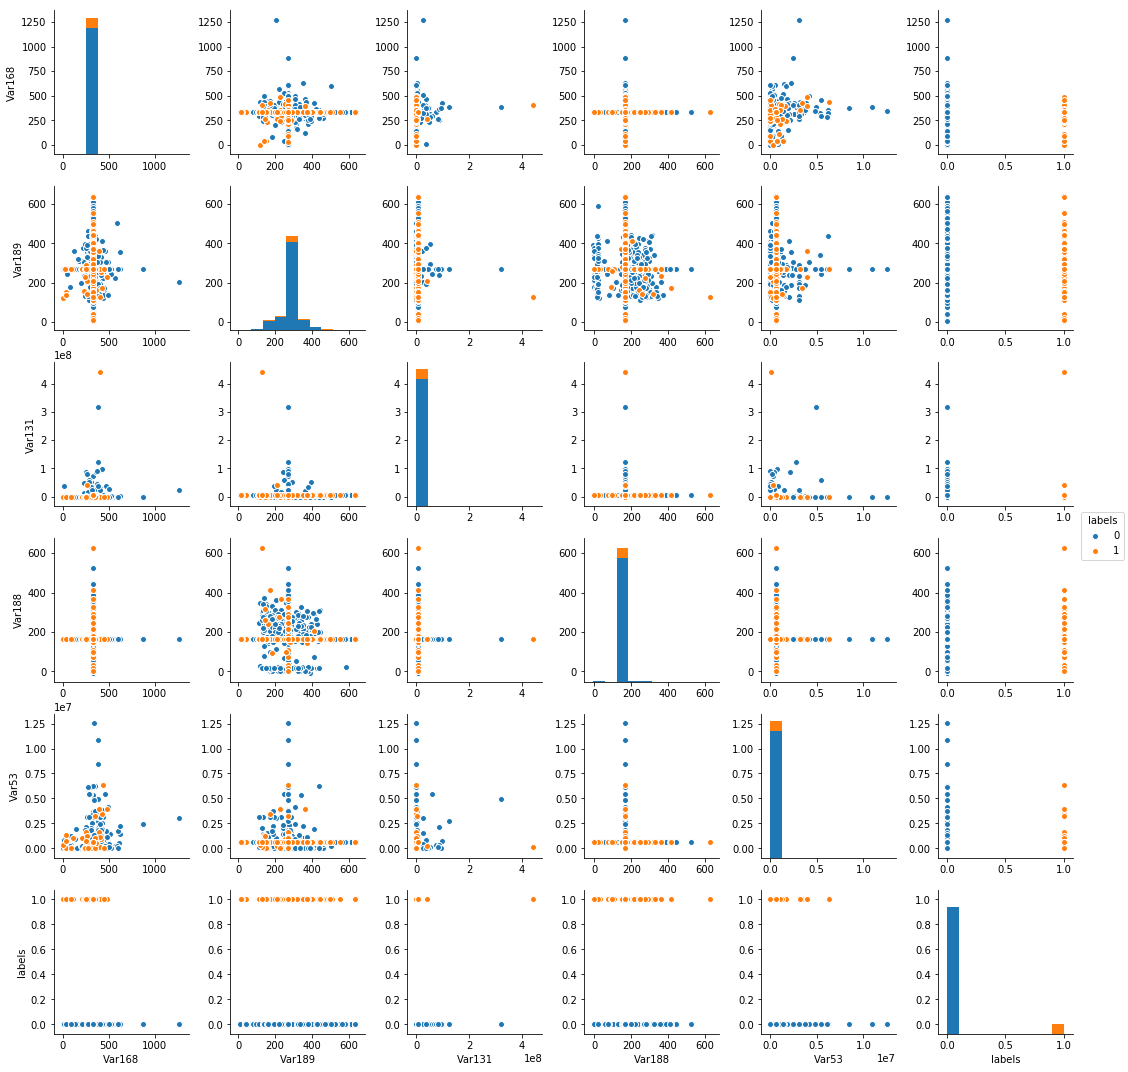

In [5]:
X_visual = pd.concat([X_num[top_num_corrs_cols.index[:5]], y], axis=1)
X_visual = X_visual.fillna(X_visual.mean())
sns.pairplot(X_visual, hue='labels', dropna=True)
plt.show()

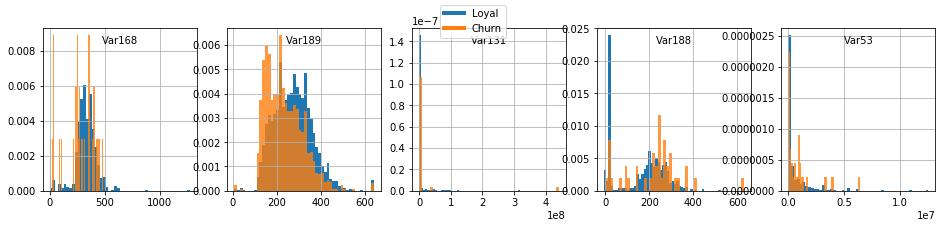

In [6]:
utils.plot_hist(X, y, top_num_corrs_cols.index[:5], 5, figsize=(16, 3))

**Категориальные признаки:**

Проделаем то же самое с категориальными признаками: выявим наиболее коррелирующие с целевой переменной и визуализируем их

In [7]:
X_cat = X.iloc[:, 190:]

for column in X_cat.columns:
    enc = LabelEncoder()
    X_cat[column] = X_cat[column].fillna('__none__')
    top_cats = X_cat[column].value_counts()[:200].index.values
    X_cat[column] = X_cat[column].apply(lambda x: x if (x in top_cats or x is None) else 'aggr')
    X_cat[column] = enc.fit_transform(X_cat[column])

top_cat_corrs = X_cat.apply(lambda col: utils.cramers_corrected_stat(col.values, y.values), axis=0)
top_cat_corrs_cols = top_cat_corrs.abs().sort_values(ascending=False)[:10]
top_cat_corrs_cols

Var217    0.137195
Var216    0.129230
Var199    0.128609
Var202    0.102573
Var218    0.101756
Var192    0.098629
Var222    0.095028
Var198    0.095028
Var220    0.095010
Var212    0.087020
dtype: float64

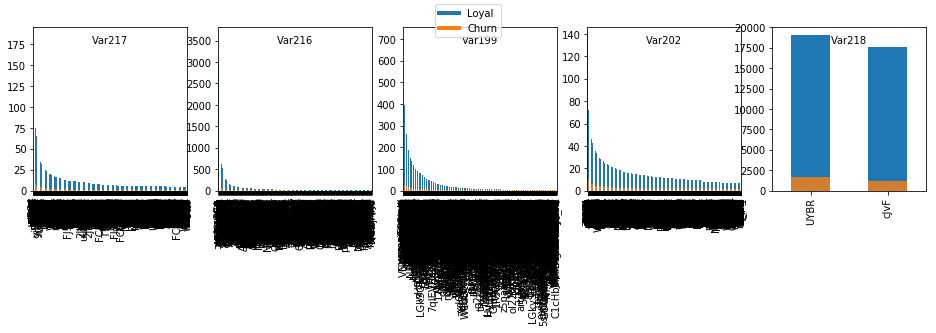

In [8]:
utils.plot_cat_classes(X, y, top_cat_corrs_cols.index[:5], 5)

Именно наиболее коррелирующие с целевой переменной признаки дадут ниабольший вклад в качество модели.

### 3.2 Построение модели

При построении и последующем обучении модели необходимо учитывать, что имеющиеся обучающие данные
1. могут быть "грязными": содержать выбросы, некорректные значения и т.п.
2. могут требовать under- или oversampling-а из-за сильного дисбаланса классов
3. содержат пропуски, которые необходимо как-то обрабатывать
4. содержат категориальные признаки, которые необходимо каким-либо образом кодировать

Все эти задачи относятся к области препроцесссинга данных, но вместе с тем качественно различны. Так, первая и вторая задачи относятся к предобработке данных *раз и навсегда* перед обучением модели - модель будет тем лучше, чем более чисты, корректны и сбалансированны данные, на которых она строится. Как следствие, такого рода препроцессинг следует проводить один раз, не включая его в последующий пайплайн (в котором будет своя последующая предобработка).

Третья и четвертая задачи также представляют собой предобработку данных, но обязаны быть включены в пайплайн, если мы хотим корректно обучать наши модели. Дело в том, что, например, после кодировки категориальных признаков некоторыми значениями вполне может оказаться так, что в продакшене возникнут новые значения категориальных переменных, и модель должна быть готова к корректной обработке этих значений. Это относится не только к ситуации "этап обучения" - "этап использования", но также справедливо, например, для корректной кросс-валидации модели.

**Фильтрация выбросов**

Выбросами будем считать те объекты, которые лежат вне $[0.01, 0.99]$ квантильного интервала, причем выделение этого интервала стелаем стратифицирванно по классам, чтобы случайно не выбросить много объектов меньшего класса. Более того, будем выбрасывать не более 200 объектов для каждой колонки, при необходимости увеличивая квантильный интервал. Описанная логика реализованна в функции *utils.filter_outliers()*. 

In [9]:
X_train, y_train = utils.filter_outliers(X_train, y_train, X_train.columns[:190])

filtering outliers...
finished:  25749


**Undersampling**

После фильтрации выбросов осталось около 26000 объектов из 32000 обучающей выборки. Посмотрим, можно ли еще более уменьшить размер выборки без существенного снижения качества *XGBClassifier* модели. Несколько забегая вперед, будем использовать пайплайн. Ниже описано, как он строится.

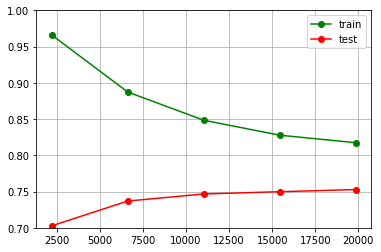

In [10]:
model = XGBClassifier(learning_rate=0.1, n_estimators=120, random_state=9, n_jobs=-1)
pipeline = utils.get_pipeline(model)

train_sizes, train_scores, test_scores = learning_curve(pipeline,
                                                        X_train, y_train,
                                                        train_sizes=np.arange(0.1, 1.0, 0.2),
                                                        cv=StratifiedKFold(n_splits=7, shuffle=True, random_state=9), 
                                                        scoring='roc_auc')

plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
plt.ylim((0.7, 1.0))
plt.legend(loc='upper right')
plt.show()

Видно, что с увеличением объема выборки качество на тесте повышается, но остается практически неизменным начинаю уже с 50% объема. Это говорит о том, что выборку можно уменьшить для увеличения скорости обучения и лучшей балансировки классов без потери качества классификации.

In [11]:
X_train, y_train = utils.undersample(X_train, y_train, 0.5)

**Заполнение пропущенных значений**

Ранее было исследовано заполнение пропущенных числовых значений по стратегиям: среднее, медиана, наиболее частотные. Было показано, что заполнение пропущенными значениями в целом дает наилучший результат.

**Кодирование категориальных признаков**

Ранее были исследованы три стратегии кодирования категориальных признаков: one-hot, средним целевой колонки, частотой. Было показано, что наилучший результат показывает one-hot кодирование с ограничением 200 сверху на число различных категорий в каждой колонке. 

**Классификатор**

Наилучший результат показал классификатор *XGBClassifier* с найденными по сетке параметрами *n_estimators=120*, *learning_rate=0.1*.

**Окончательная модель**

- фильтрация выбросов
- 50% undersample-инг
- Заполнение пропущенных числовых значений средним
- dummy-энкодинг категориальных переменных
- отбор признаков по корреляции с целевой переменной с максимальным числом признаков равным 30
- классификатог - *XGBClassifier* с *n_estimators*=120, *learning_rate*=0.1 и остальными параметрами по умолчанию

Схематично сказанное можно отобразить на диаграмме

<img src="pipeline.png", width=600>

**Обучение модели**

In [12]:
model = XGBClassifier(learning_rate=0.1, n_estimators=120, random_state=9, n_jobs=-1)
pipeline = utils.get_pipeline(model)

pipeline.fit(X, y)

y_pred = pipeline.predict_proba(X)[:, 1]
score = roc_auc_score(y, y_pred)
score

0.7891927373758143

## 4. Применение модели и анализ результатов

Проанализируем, какой топ пользователей $g$, склонных к оттоку согласно модели, оптимально выбрать для проведения кампании по удержанию для таким образом, чтобы экономический эффект $L$ был наибольшим.

Выберем параметры по умолчанию

In [13]:
# средний доход от одного пользователя
M = 100   

# средняя цена удержания одного пользователя
H = 30

# вероятность пользователю принять наше предложение и остаться
p = 0.5

# ТОП % пользователей, участвующих в кампании
g = 1

# Максимальный размер кампании
T = 20000

### 4.1 Зависимость экономического эффекта от % вовлеченных в кампанию пользователей

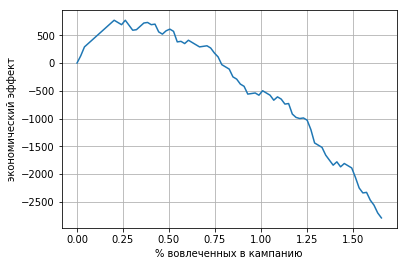

0.20202020202020204

In [14]:
gs, ls = utils.involved_vs_effect(y, y_pred, M=M, H=H, p=p, T=T)
gs[np.argmax(np.array(ls))]

Мы видим, что при выбранных выше значениях по умолчанию наиболее выгодно строит кампанию на приблизительно $0.2\%$ пользователей

### 4.2 Зависимость % вовлеченных и эффекта от стоимости удержания пользователя

Будем теперь варьировать стоимость удержания пользователя $H$ и посмотрим, какое количество пользователей выгоднее всего брать и какой экономический эффект будет этому соответствовать

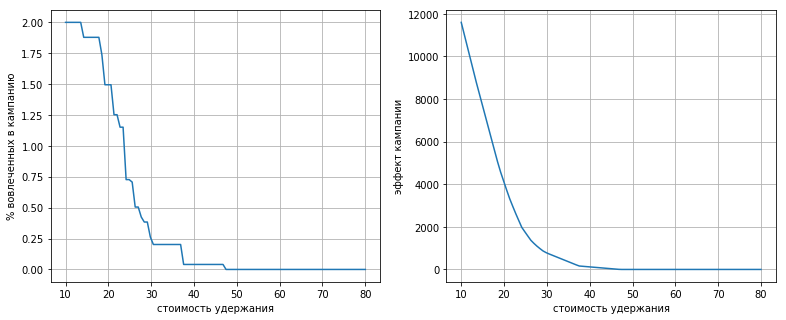

In [15]:
utils.involved_vs_other(y, y_pred, M=M, p=p, T=T)

### 4.3 Зависимость % вовлеченных и эффекта от вероятности принять предложение

И то же самое проделаем для вероятности $p$

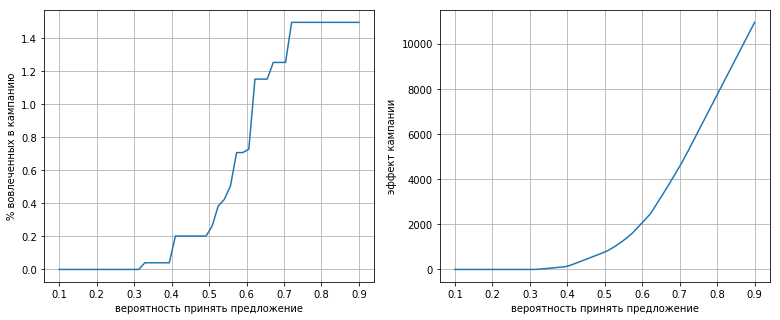

In [16]:
utils.prob_vs_other(y, y_pred, M=M, H=H, T=T)

Мы видим, что кампания не всегда выгодна. Так, например, из формулы для экономического эффекта следует, что при $p \cdot M - H < 0$ экономический эффект отрицателен, а следовательно кампания невыгодна.

### 4.4 Зависимость экономического эффекта от качества модели

Оценим изменение экономического эффекта от проведения кампании по удержанию при увеличении качества модели. Напомним, что качество мы оцениваем по ROC-AUC метрике.

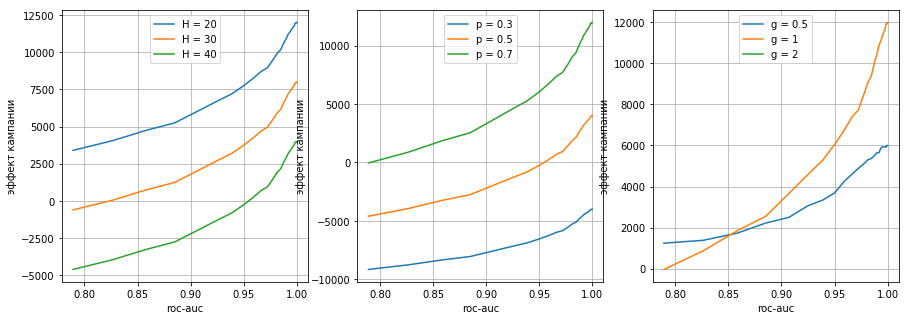

In [17]:
utils.score_vs_campaigh_eff(y, y_pred, M=M, H=H, p=p, g=g, T=T)

Видно, что с увеличением качества модели эффект кампании существенно возрастает. Так что вложение денег в увеличение качества модели может быть вполне оправдано.

## 5. Итоги и выводы

Была проведена довольно обширная работа по исследованию оттока клиентов. Была построена экономическая и программная модель, количественно оценены риски и выгода от внедрения модели на практике.

**Основные выводы**

- Предоставленные данные адекватны, построение на них модели приемлемо. Данные содержат выбросы, не сильно, впрочем, влияющие на качество модели
- Предоставленные данные избыточны по объему. Вполне достаточно использования 30-50% от общего их объема без существенного снижения качества модели
- Построена простая, но эффективная экономическа модель, оценивающая экономический эффект кампании по удержанию пользователей и  учитывающая 1. средний доход от одного пользователя, 2. среднюю цену удержания одного пользователя, 3. вероятность пользователю принять наше предложение и остаться, 4. ТОП % пользователей, участвующих в кампании, 5. Максимальный размер кампании.
- Качество построенной  программной модели, измеряемое в ROC-AUC метрике, составило 0.78. При увеличении качества модели общий экономический эффект кампании может увеличиться на порядок

**Оценка качества**
    
Качество работы модели можно оценить онлайн в виде одного или ряда А/Б тестов. Общая схема такого тестирования модет быть следующей:

1. выделяем репрезентативные основную и контрольную группу пользователей
2. для основной группы проводим кампанию по удержанию: применяем полученную модель, определяем пользователей, готовых уйти и тратимся на их удержание
3. сравниваем результаты с контрольной группой методами математической статистики

**Эксплуатация модели**

После внедрения модели необходимо регулярно (например, раз в месяц) проводить проверку ее качества на новых данных. При снижении качества модель необходимо доучивать на новых данных.